# Introduction to Matplotlib

<a href='https://realpython.com/python-matplotlib-guide/'>Matplotlib Guide</a>

In [2]:
# plots to be in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

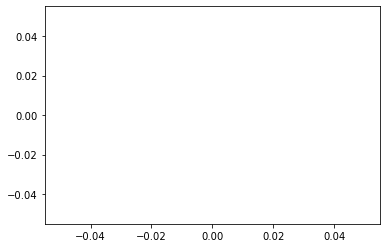

In [3]:
plt.plot()

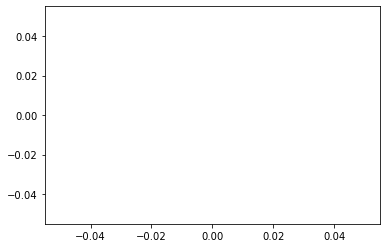

In [4]:
plt.plot(); # semicolon to not plot the data output []

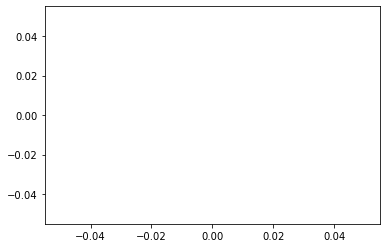

In [5]:
plt.plot()
plt.show() # same as using the semicolon (example above)

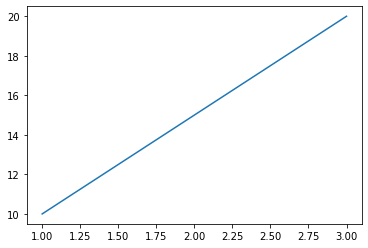

In [6]:
x = [1,2,3]
y = [10, 15, 20]
plt.plot(x, y);

## Matplotlib Object Hierachy
You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:
![](figure-object.webp)

### Anatomy of a Figure
![](matplotlib-anatomy-of-a-plot.png)

## Methods for creating a figure

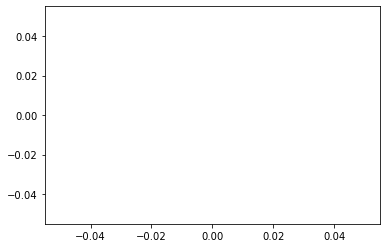

In [7]:
# Method 0
plt.plot();

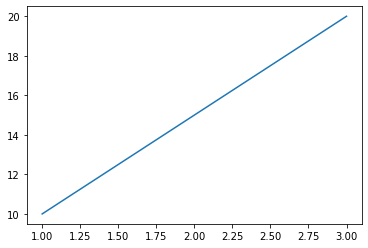

In [8]:
# Method 1
fig = plt.figure() # creates figure
ax = fig.add_subplot() # adds axes
ax.plot(x, y) # add data
plt.show()

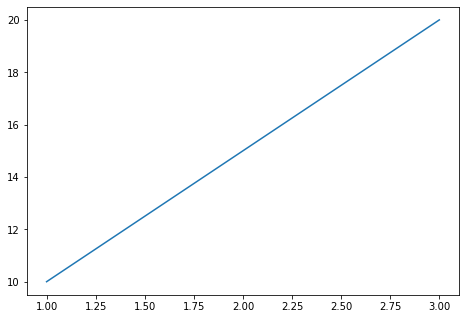

In [9]:
# Method 2
fig = plt.figure() # creates figure
ax = fig.add_axes([1, 1, 1, 1]) # add axes 
ax.plot(x, y) # add data
plt.show()

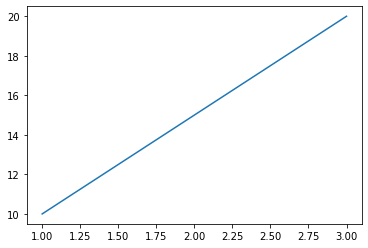

In [10]:
# Method 3 (recommended)
fig, ax = plt.subplots()
ax.plot(x, y) # add data
plt.show()

In [11]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

## Matplotlib Example Workflow 

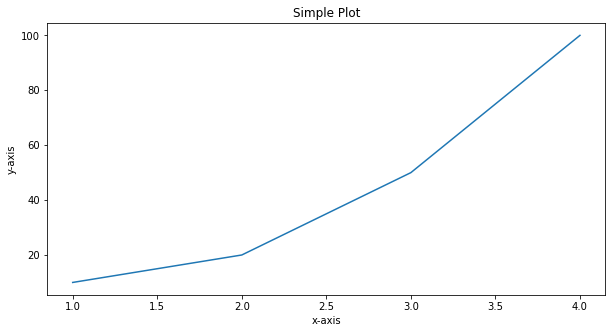

In [12]:
# 0. Import matplotlib and get it ready for Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [10, 20, 50, 100]

# 2. Setup plot
fix, ax = plt.subplots(figsize = (10, 5)) # create subplot with a width of 20 and height of 10

# 3. Plot data
ax.plot(x, y)

# 4. Customise plot
ax.set(title='Simple Plot',
      xlabel='x-axis',
      ylabel='y-axis')

# Save & show
fig.savefig('numpy-images/sample-plot.png')

## Making Figures with NumPy Arrays

Types of plots to be created:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [13]:
import numpy as np

In [14]:
# Create data
x = np.linspace(0, 10, 100, endpoint=False) # same as np.arange(0, 10, 10/100)
x[:5]

array([0. , 0.1, 0.2, 0.3, 0.4])

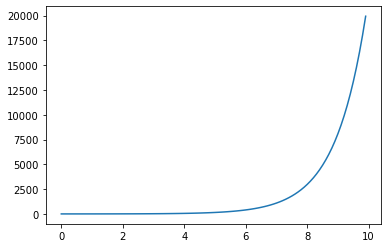

In [15]:
# Plot the data in a line plot
fix, ax = plt.subplots()
ax.plot(x, np.exp(x));

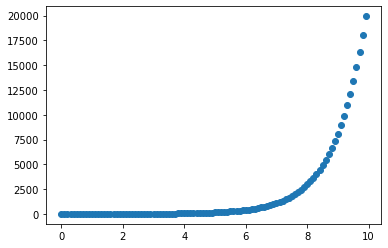

In [16]:
# Plot the data in a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

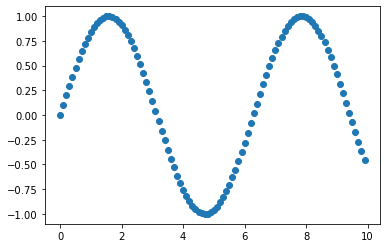

In [17]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

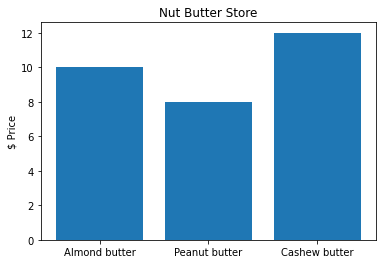

In [18]:
# Make plot from dictionary
nut_butter_prices = {'Almond butter': 10,
                     'Peanut butter': 8,
                     'Cashew butter': 12}

# Plot the data in a bar plot
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(title='Nut Butter Store',
       ylabel='$ Price'
       );

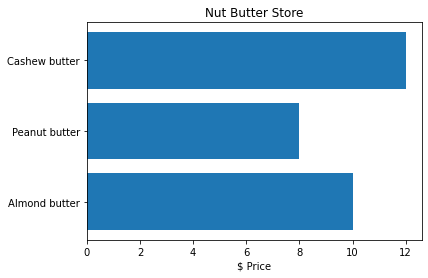

In [19]:
# Plot the data in a horizontal bar plot
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title='Nut Butter Store',
       xlabel='$ Price');

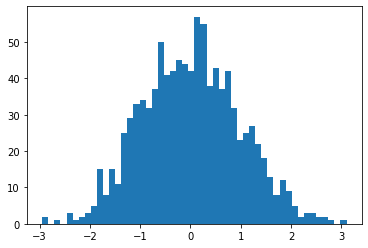

In [20]:
# Make random data from the normal distribution
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x, 50); # create historgram with 50 bins

## Two Options For Subplots

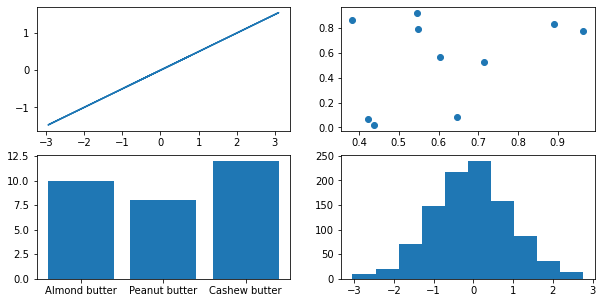

In [21]:
# Option #1: unpack the axes
# If more than one row and column are created, ax will be a tuple of tuples
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10,5))
np.random.seed(0)

ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000));

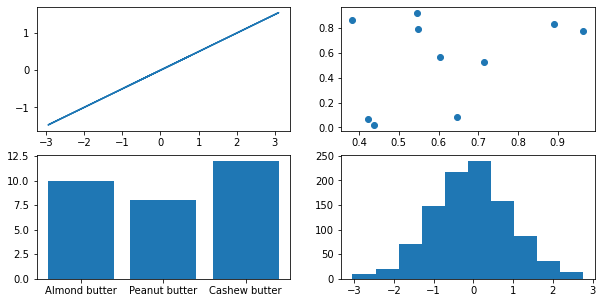

In [22]:
# Option #2: use an axes array
fig, ax = plt.subplots(ncols=2,
                       nrows=2,
                       figsize=(10,5))
np.random.seed(0)
# Plot to each different index [rowIndex, columnIndex]
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(np.random.randn(1000));

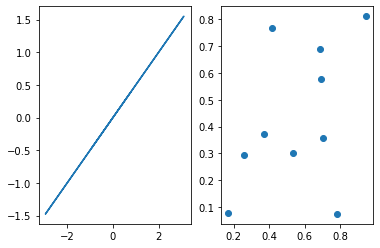

In [23]:
# Only plot 2 subplots (option #1)
# If n rows or columns are created, ax is an n-tuple
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10));

# Plotting From Pandas DataFrames

## Stateful (non-object-oriented pyplot) method

In [24]:
import pandas as pd

In [25]:
# Make a dataframe
car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [26]:
# convert prices to integers
car_sales['Price'] = car_sales['Price'].str.replace('$', '')
car_sales['Price'] = car_sales['Price'].str.replace(',', '')
car_sales['Price'] = car_sales['Price'].str.replace('.', '')
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales['Price'] = (car_sales['Price']/100).astype(int)
car_sales['Price']

<ipython-input-26-712994059f9b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  car_sales['Price'] = car_sales['Price'].str.replace('$', '')
<ipython-input-26-712994059f9b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  car_sales['Price'] = car_sales['Price'].str.replace('.', '')


0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: int64

In [27]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2021', periods=1000))
ts

2021-01-01    0.985318
2021-01-02    0.766920
2021-01-03    0.402626
2021-01-04   -1.775888
2021-01-05    1.669251
                ...   
2023-09-23    0.210359
2023-09-24   -0.005927
2023-09-25    1.366060
2023-09-26    1.555114
2023-09-27    0.613326
Freq: D, Length: 1000, dtype: float64

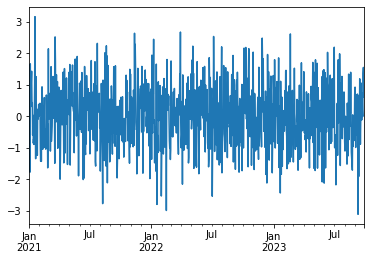

In [28]:
ts.plot();

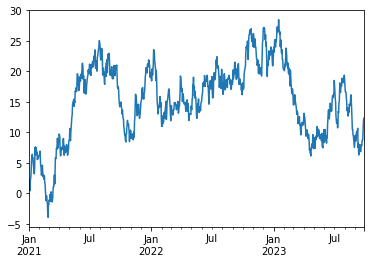

In [29]:
tsCumsum = ts.cumsum()
tsCumsum.plot();

In [30]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [31]:
car_sales2 = pd.read_csv('car-sales.csv')
car_sales2['Price'] = car_sales2['Price'].str.replace('[/$/,/.]','')
car_sales2['Price']

<ipython-input-31-df099711b16d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales2['Price'] = car_sales2['Price'].str.replace('[/$/,/.]','')


0     400000
1     500000
2     700000
3    2200000
4     350000
5     450000
6     750000
7     700000
8     625000
9     970000
Name: Price, dtype: object

In [32]:
# returns a string
type(car_sales2['Price'][0])

str

In [33]:
# slicing the object returns a series object (note: [:1] is equivalent to [slice(1)])
car_sales2['Price'][slice(2)]
car_sales2['Price'][:2]

0    400000
1    500000
Name: Price, dtype: object

In [34]:
type(car_sales2['Price'][:2])

pandas.core.series.Series

In [35]:
# won't work because it is a string: car_sales2['Price'][0].str[:-2]
# .str only works on series objects
# remove last two characters
car_sales2['Price'][:2].str[:-2]

0    4000
1    5000
Name: Price, dtype: object

In [36]:
# remove last two characters of entire series
car_sales2['Price'] = car_sales2['Price'].str[:-2]

In [37]:
# Add a sale date column with the date_range function
car_sales['Sale Date'] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [38]:
car_sales['Total Sales'] = car_sales['Price'].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


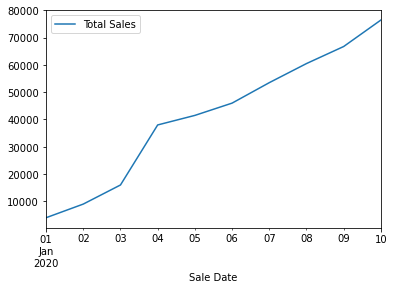

In [39]:
car_sales.plot(x='Sale Date',y='Total Sales');

### Scatter plot on Pandas DataFrame 

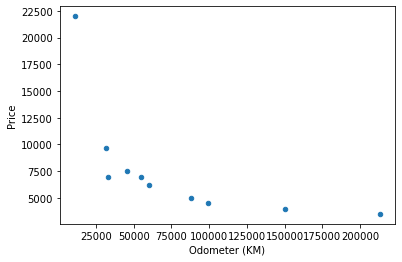

In [40]:
# Method #1
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

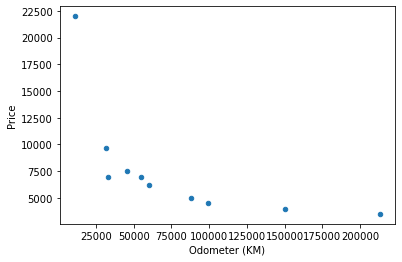

In [41]:
# Method #2
car_sales.plot.scatter(x='Odometer (KM)', y='Price');

### Bar plot on Pandas DataFrame

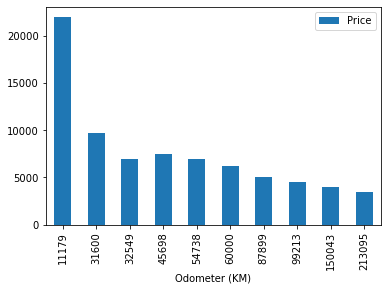

In [42]:
# Plot Odometer against Price; 
# first sort based on odometer column to get a sequential x-axis as in .scatter
car_sales.sort_values('Odometer (KM)').plot.bar(x='Odometer (KM)', y='Price');

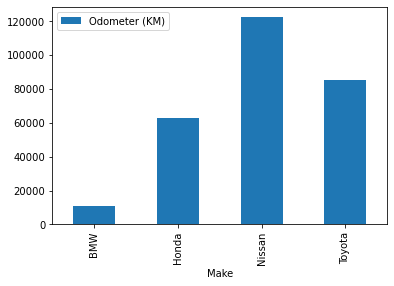

In [43]:
# Bar plot of grouped Make vs Odometer
# Note: x is not assigned as Make is the index of the DataFrame after grouping and x only needs to be assigned to columns
car_sales.groupby('Make').mean().plot(kind='bar', y='Odometer (KM)');

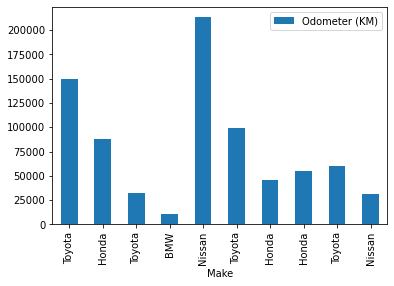

In [44]:
# Bar plot of Make vs Odometer
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

### Histograms from Pandas DataFrames

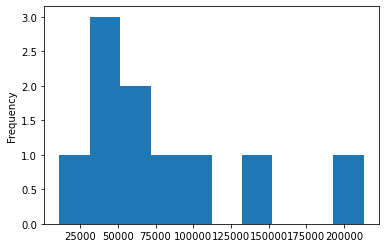

In [45]:
car_sales['Odometer (KM)'].plot.hist();

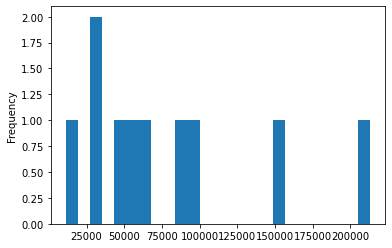

In [46]:
car_sales['Odometer (KM)'].plot.hist(bins=25);

In [47]:
# Try another dataset
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

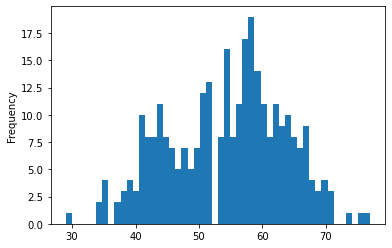

In [49]:
# Age histogram
heart_disease['age'].plot.hist(bins=50);

In [50]:
np.mean(heart_disease['age']), np.std(heart_disease['age'])

(54.366336633663366, 9.067101638577872)

In [51]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


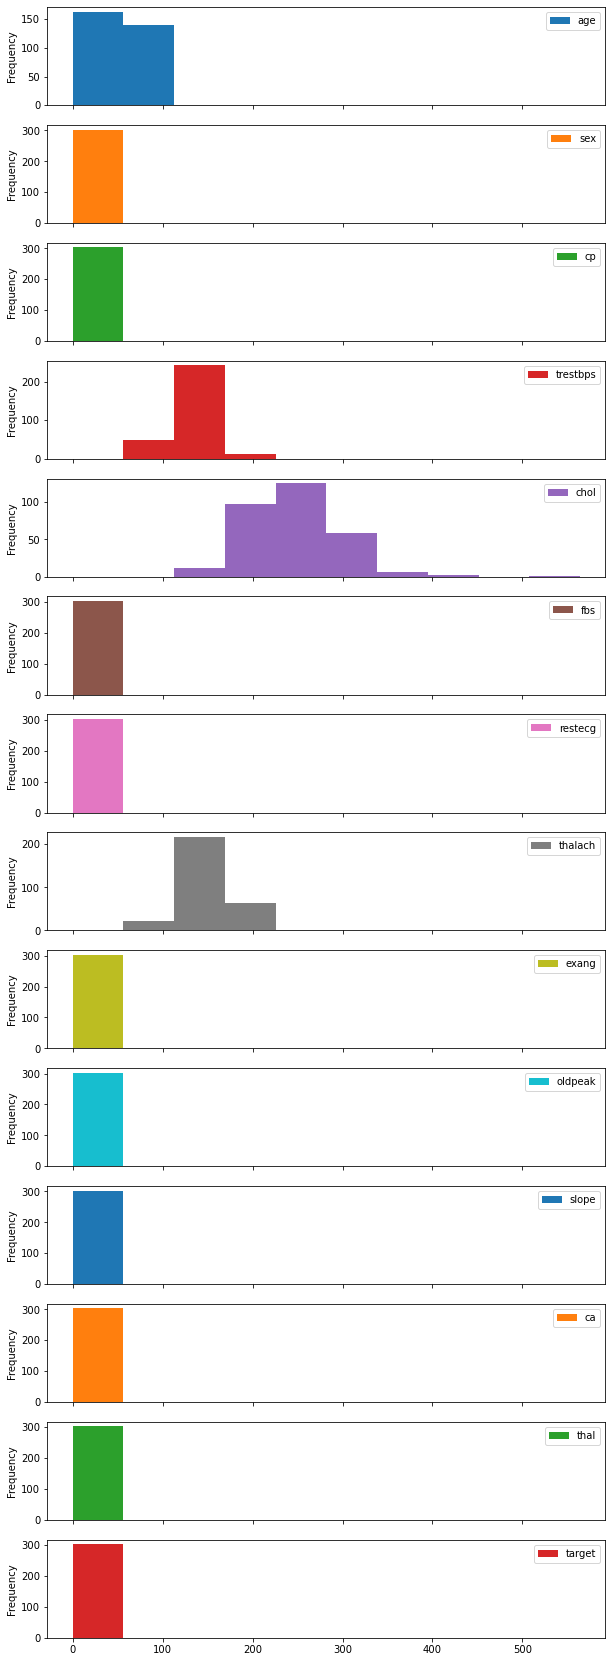

In [52]:
# Make histograms of all parameters
heart_disease.plot.hist(figsize=(10,30), subplots=True);

## Stateless (object-oriented matplotlib) method

### Pyplot vs Matplotlib

* When plotting something quickly, okay to use pyplot (non-OO) method
* When plotting something more advance, use matplotlib (OO) method

In [53]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
over_50 = heart_disease[heart_disease.age > 50]
over_50.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [55]:
len(over_50), len(heart_disease)

(208, 303)

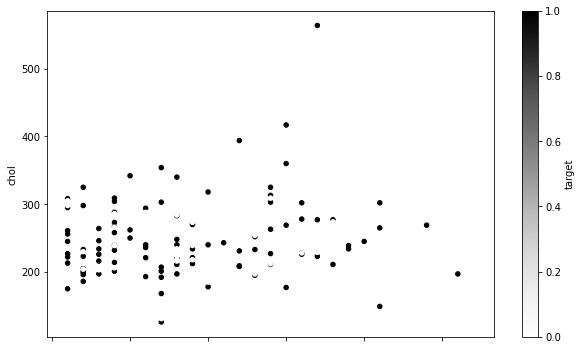

In [56]:
# Pyplot method
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             figsize=(10,6));

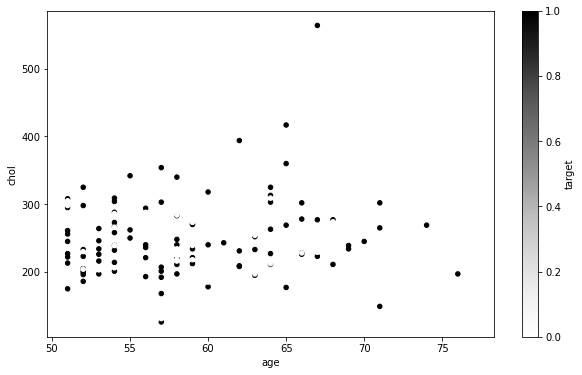

In [57]:
# Matplotlib OO method mixed with Pyplot method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax); #pass ax object to plot
# ax.set_xlim([45, 100]); #set min and max of x axis

In [58]:
over_50.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

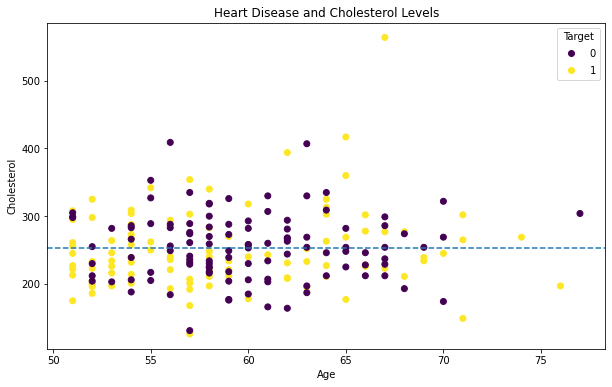

In [59]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50['age'], 
                     y=over_50['chol'],
                     c=over_50['target']);

# Customize the plot
ax.set(title='Heart Disease and Cholesterol Levels',
       xlabel='Age',
       ylabel='Cholesterol');

# Add a legend
ax.legend(*scatter.legend_elements(), title='Target');
# *scatter.legend_elements() - *args
# grab scatter and unpack legend_elements, which refers to c

# Add a horizontal line
ax.axhline(over_50['chol'].mean(),
           linestyle='--');

In [60]:
# print all properties of scatter object
# dir(scatter)
# print all properties of scatter.legend_elements()
# dir(scatter.legend_elements())

In [61]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


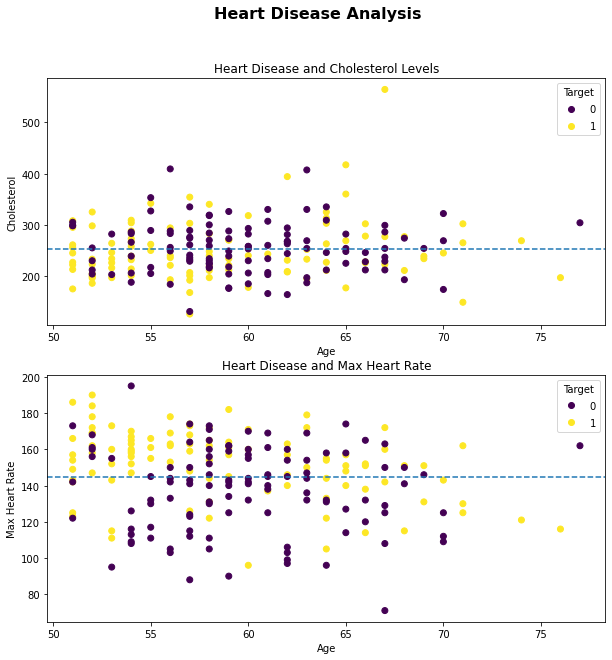

In [62]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10));

# Add data to ax0
scatter = ax0.scatter(x=over_50['age'],
                      y=over_50['chol'],
                      c=over_50['target']);

# Customize ax0
ax0.set(title='Heart Disease and Cholesterol Levels',
        xlabel='Age',
        ylabel='Cholesterol');

# Add Legend to ax0
ax0.legend(*scatter.legend_elements(), title='Target');

# Add a meanline to ax0
ax0.axhline(y=over_50['chol'].mean(),
            linestyle='--');

# Add data to ax1
scatter1 = ax1.scatter(x=over_50['age'],
                       y=over_50['thalach'],
                       c=over_50['target']);

# Customize ax1
ax1.set(title='Heart Disease and Max Heart Rate',
       xlabel='Age',
       ylabel='Max Heart Rate');

# Add Legend to ax1
ax1.legend(*scatter1.legend_elements(), title='Target');

# Add a meanline to ax1
ax1.axhline(y=over_50['thalach'].mean(),
            linestyle='--');

# Add a title to the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [85]:
# over_50
over_50.loc[:, ['sex','target']]

,sex,target
0,1,1
3,1,1
4,0,1
5,1,1
6,0,1
...,...,...
297,1,0
298,0,0
300,1,0
301,1,0


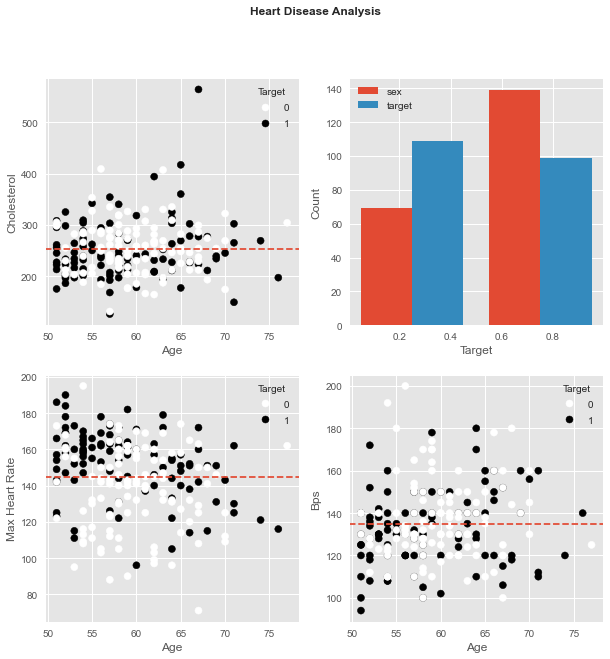

In [94]:
# Subplot of chol, age, thalach, sex, target
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10,10));
scatter0 = ax0.scatter(x=over_50['age'],
                       y=over_50['chol'],
                       c=over_50['target']);
ax0.set(xlabel='Age',
        ylabel='Cholesterol');
ax0.legend(*scatter0.legend_elements(),title='Target');
ax0.axhline(y=over_50['chol'].mean(),
            linestyle='--');

# hist1 = ax1.hist(over_50['target'], bins=2);
hist1 = ax1.hist(over_50.loc[:, ['sex','target']], bins=2, label=['sex','target']);
ax1.legend(prop={'size': 10})

ax1.set(xlabel='Target',
        ylabel='Count');

scatter2 = ax2.scatter(x=over_50['age'],
                       y=over_50['thalach'],
                       c=over_50['target']);
ax2.set(xlabel='Age',
        ylabel='Max Heart Rate');
ax2.legend(*scatter2.legend_elements(), title='Target');
ax2.axhline(y=over_50['thalach'].mean(),
            linestyle='--');

scatter3 = ax3.scatter(x=over_50['age'],
                       y=over_50['trestbps'],
                       c=over_50['target']);
ax3.set(xlabel='Age',
        ylabel='Bps');
ax3.legend(*scatter3.legend_elements(), title='Target');
ax3.axhline(y=over_50['trestbps'].mean(),
            linestyle='--');

fig.suptitle('Heart Disease Analysis', fontsize=12, fontweight='bold');

## Customising Matplotlib plots and edit styles

In [64]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [65]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500


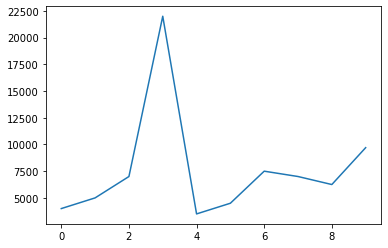

In [66]:
car_sales['Price'].plot();

In [67]:
# Change the style
plt.style.use('seaborn-whitegrid')

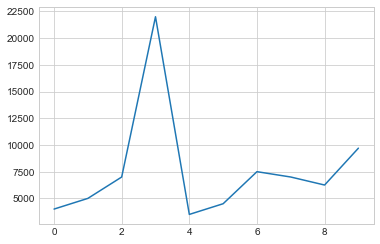

In [68]:
car_sales['Price'].plot();

In [69]:
plt.style.use('seaborn')

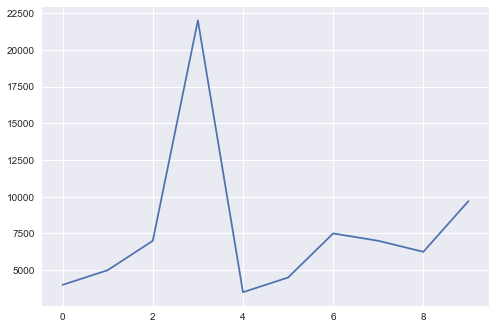

In [70]:
# same: car_sales.plot(y='Price');
car_sales['Price'].plot();

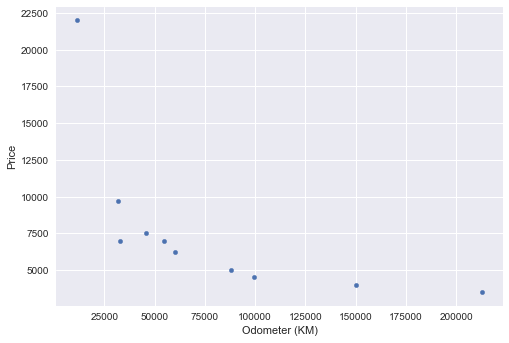

In [71]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

In [72]:
plt.style.use('ggplot')

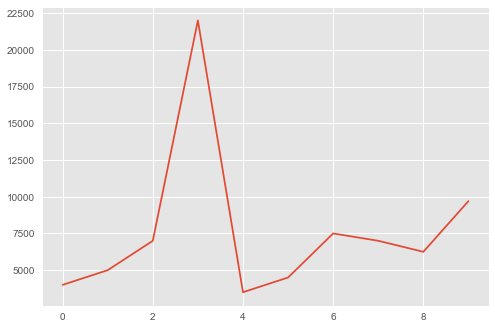

In [73]:
car_sales['Price'].plot();

In [74]:
# Create some data
x = np.random.randn(10, 4)
x

array([[-0.28595915,  1.49691099,  1.18311956,  0.71889717],
       [-1.21607658,  0.1406719 , -0.74367217, -0.15901225],
       [ 0.24005693,  0.10015941, -0.47517511,  1.27295375],
       [-1.69613127,  0.73018353, -1.85748327,  0.38259814],
       [-0.88690433,  0.87830376,  0.08645252,  0.24770638],
       [-1.01827933, -0.65457013,  0.20721739,  0.58356993],
       [ 2.92909624,  0.22285832,  0.97603753, -1.55693393],
       [-1.32989186, -0.35549477, -1.1974277 ,  1.48639925],
       [-0.41021869,  1.38218189,  1.48678247,  0.04277972],
       [ 0.50179975, -0.05609947,  0.538437  ,  0.48334185]])

In [75]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.285959,1.496911,1.183120,0.718897
1,-1.216077,0.140672,-0.743672,-0.159012
2,0.240057,0.100159,-0.475175,1.272954
3,-1.696131,0.730184,-1.857483,0.382598
4,-0.886904,0.878304,0.086453,0.247706
5,-1.018279,-0.654570,0.207217,0.583570
6,2.929096,0.222858,0.976038,-1.556934
7,-1.329892,-0.355495,-1.197428,1.486399
8,-0.410219,1.382182,1.486782,0.042780
9,0.501800,-0.056099,0.538437,0.483342


matplotlib.axes._subplots.AxesSubplot

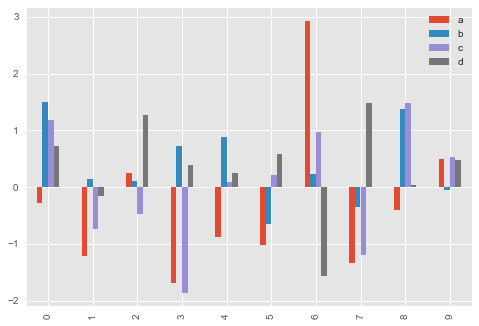

In [76]:
ax = df.plot(kind='bar')
type(ax)

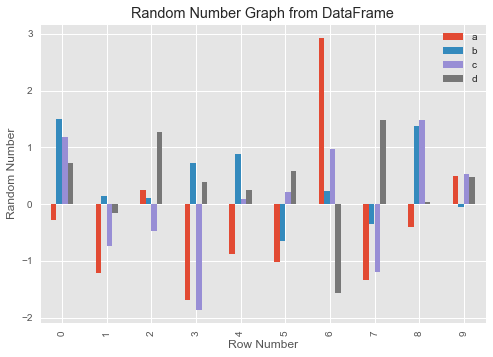

In [95]:
# Customize plot with the set() method
ax = df.plot(kind='bar')
# Add labels and title
ax.set(title='Random Number Graph from DataFrame',
       xlabel='Row Number',
       ylabel='Random Number')
# Make the legend visible
ax.legend().set_visible(True)